In [1]:
# Loading the required libraries

import pandas as pd
import numpy as np

In [3]:
# Loading the datasets

df_risk = pd.read_csv(r"C:\Users\Harshit\Downloads\supply_chain_risk_management_balanced_final_v13_updated.csv")
df_planning = pd.read_csv(r"C:\Users\Harshit\Downloads\long_range_supply_planning_balanced_final_v13_updated.csv")
df_continuity = pd.read_csv(r"C:\Users\Harshit\Downloads\business_continuity_planning_balanced_final_v13_updated.csv") 

In [5]:
# Displaying the first five rows of the datasets

print("Supply Chain Risk Management Dataset: ")
print(df_risk.head(), "\n")

print("Supply Planning Dataset: ")
print(df_planning.head(), "\n")

print("Business Continuity Dataset: ")
print(df_continuity.head(), "\n")

Supply Chain Risk Management Dataset: 
         Date     Location Product      Demand      Supply  Lead_Time  \
0  2018-01-31     New York   DrugB  406.490352  143.273054   8.110173   
1  2018-12-30  Los Angeles   DrugA  824.467357  682.164829  45.314676   
2  2017-05-10      Phoenix   DrugB  147.152166  319.511952  48.472006   
3  2018-07-18     New York   DrugB  243.662411  291.971222  49.602750   
4  2018-02-04      Houston   DrugB  402.060946  948.179710  39.698327   

          Cost  Order_Quantity   Order_Cost  Demand_Supply_Difference  \
0   486.618965      227.897813  1973.001596               -218.283525   
1   547.633940      117.316830  2241.417032               -289.704773   
2  2194.300611       60.282891   117.561376               -363.722695   
3   760.509359       38.531793  2878.953671               -475.503268   
4  4576.981027      104.920825  1066.101853                435.725849   

    Shortage  
0 -62.141958  
1 -55.529694  
2 -64.164505  
3 -59.721327  
4 -50.44

In [83]:
# Understanding the datasets

print("Supply Chain Risk Management Dataset: ")
print(df_risk.info(), "\n")

print("Supply Planning Dataset: ")
print(df_planning.info(), "\n")

print("Business Continuity Dataset: ")
print(df_continuity.info(), "\n")


Supply Chain Risk Management Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      2000 non-null   object 
 1   Location                  2000 non-null   object 
 2   Product                   2000 non-null   object 
 3   Demand                    2000 non-null   float64
 4   Supply                    2000 non-null   float64
 5   Lead_Time                 2000 non-null   float64
 6   Cost                      2000 non-null   float64
 7   Order_Quantity            2000 non-null   float64
 8   Order_Cost                2000 non-null   float64
 9   Demand_Supply_Difference  2000 non-null   float64
 10  Shortage                  2000 non-null   float64
dtypes: float64(8), object(3)
memory usage: 172.0+ KB
None 

Supply Planning Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20

In [9]:
# General stats
print("Risk Dataset")
print(df_risk.describe())

print("Planning Dataset")
print(df_planning.describe())

print("Continuity Dataset")
print(df_continuity.describe())

Risk Dataset
            Demand       Supply    Lead_Time         Cost  Order_Quantity  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean    537.798661   505.316931    25.467086  2552.273598      155.462928   
std     261.208126   258.127104    14.212406  1407.438594       83.477755   
min     100.167875    50.564765     1.055442   100.907457       10.034407   
25%     311.895767   290.059107    13.361548  1374.970778       83.249637   
50%     531.852613   511.335030    25.577426  2528.659240      157.122556   
75%     764.427405   723.021622    38.020536  3744.444865      226.813638   
max     999.144548   949.864320    49.987322  4998.214565      299.946849   

        Order_Cost  Demand_Supply_Difference     Shortage  
count  2000.000000               2000.000000  2000.000000  
mean   1525.155393                 -8.166308    -0.272903  
std     839.767060                285.921376    57.847715  
min      50.709976               -499.824484   -99.95

In [55]:
# Cleaning the datasets
from sklearn.impute import SimpleImputer

# Decided to create a data cleaning and imputation function for making the cleaning process less complex
def clean_data_with_imputation(df):
    df = df.drop_duplicates()
    
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
        elif 'year' in col.lower():
            df[col] = pd.to_numeric(df[col], errors='coerce')
        elif 'time' in col.lower() or 'duration' in col.lower() or 'quantity' in col.lower() or 'cost' in col.lower() or 'demand' in col.lower() or 'supply' in col.lower():
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
    
    return df

# Cleaned Datasets
df_continuity_clean = clean_data_with_imputation(df_continuity)
df_planning_clean = clean_data_with_imputation(df_planning)
df_risk_clean = clean_data_with_imputation(df_risk)

In [57]:
# Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
sns.set(style="whitegrid")

# EDA for Business Continuity Planning Dataset
def eda_continuity(df):

    # Plot distributions
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    sns.histplot(df['Impact'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Distribution of Impact')
    
    sns.histplot(df['Recovery_Time'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of Recovery Time')
    
    sns.histplot(df['Cost_Impact'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Cost Impact')
    
    sns.histplot(df['Duration_Days'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Duration Days')
    
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plot_correlation_matrix(df.select_dtypes(include=['float64', 'int64']), 'Correlation Matrix - Business Continuity Planning')

In [63]:
# EDA for Long Range Supply Planning Dataset
def eda_planning(df):

    # Plot distributions
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))
    
    sns.histplot(df['Demand_Forecast'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Distribution of Demand Forecast')
    
    sns.histplot(df['Supply_Forecast'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of Supply Forecast')
    
    sns.histplot(df['Budget'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Budget')
    
    sns.histplot(df['Planned_Production'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Planned Production')
    
    sns.histplot(df['Planned_Inventory'], kde=True, ax=axes[2, 0])
    axes[2, 0].set_title('Distribution of Planned Inventory')
    
    sns.histplot(df['Production_Cost'], kde=True, ax=axes[2, 1])
    axes[2, 1].set_title('Distribution of Production Cost')
    
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plot_correlation_matrix(df.select_dtypes(include=['float64', 'int64']), 'Correlation Matrix - Long Range Supply Planning')

In [65]:
# EDA for Supply Chain Risk Management Dataset
def eda_risk(df):
    
    # Plot distributions
    fig, axes = plt.subplots(4, 2, figsize=(14, 20))
    
    sns.histplot(df['Demand'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Distribution of Demand')
    
    sns.histplot(df['Supply'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of Supply')
    
    sns.histplot(df['Lead_Time'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Lead Time')
    
    sns.histplot(df['Cost'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Cost')
    
    sns.histplot(df['Order_Quantity'], kde=True, ax=axes[2, 0])
    axes[2, 0].set_title('Distribution of Order Quantity')
    
    sns.histplot(df['Order_Cost'], kde=True, ax=axes[2, 1])
    axes[2, 1].set_title('Distribution of Order Cost')
    
    sns.histplot(df['Demand_Supply_Difference'], kde=True, ax=axes[3, 0])
    axes[3, 0].set_title('Distribution of Demand-Supply Difference')
    
    sns.histplot(df['Shortage'], kde=True, ax=axes[3, 1])
    axes[3, 1].set_title('Distribution of Shortage')
    
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plot_correlation_matrix(df.select_dtypes(include=['float64', 'int64']), 'Correlation Matrix - Supply Chain Risk Management')


C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

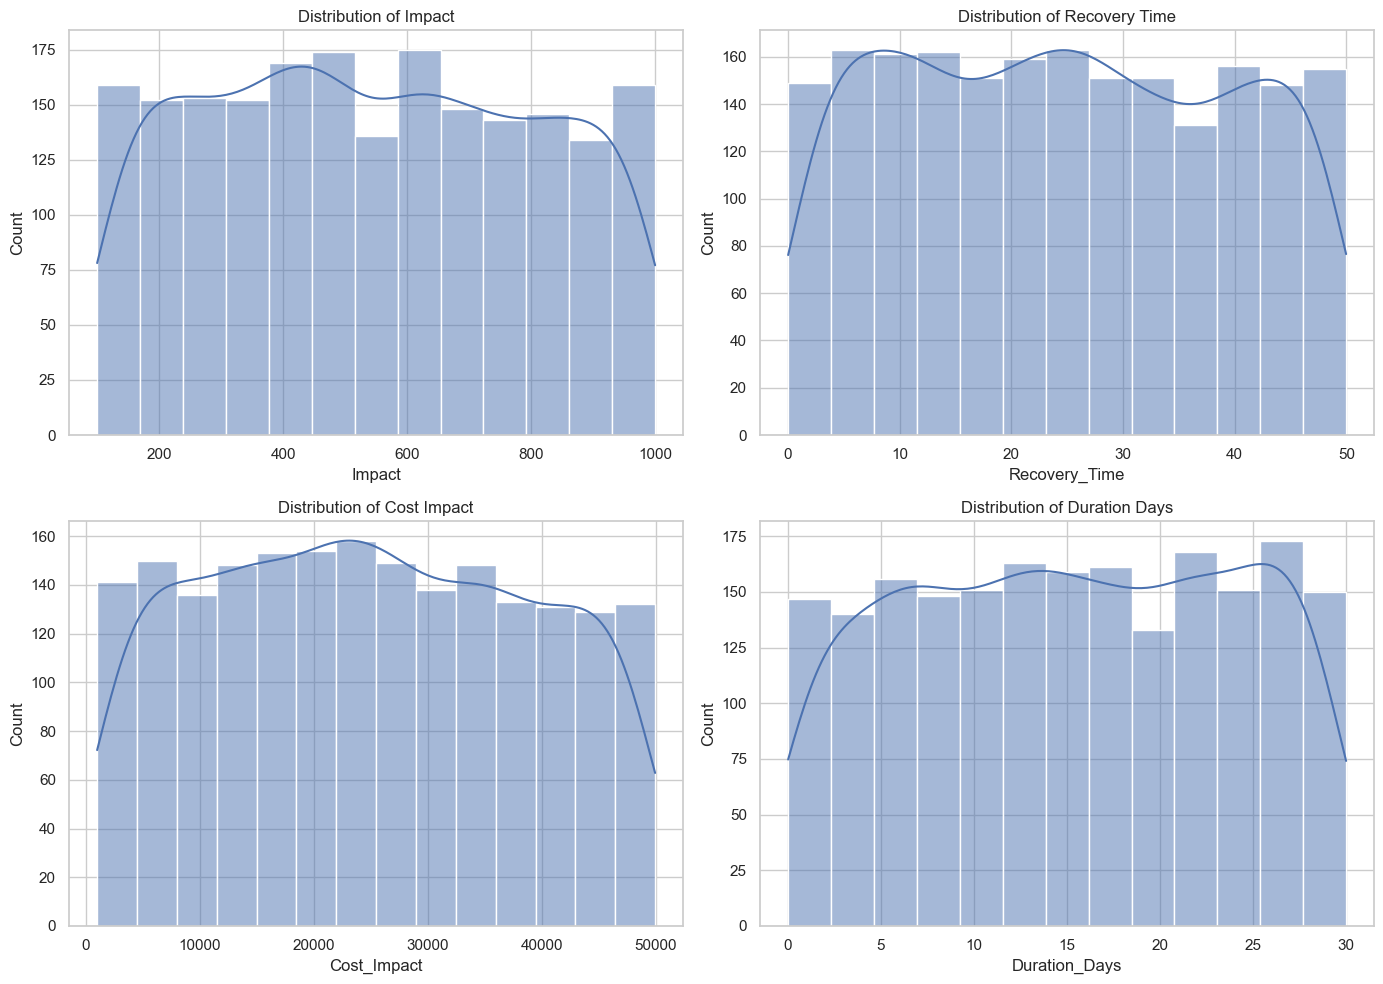

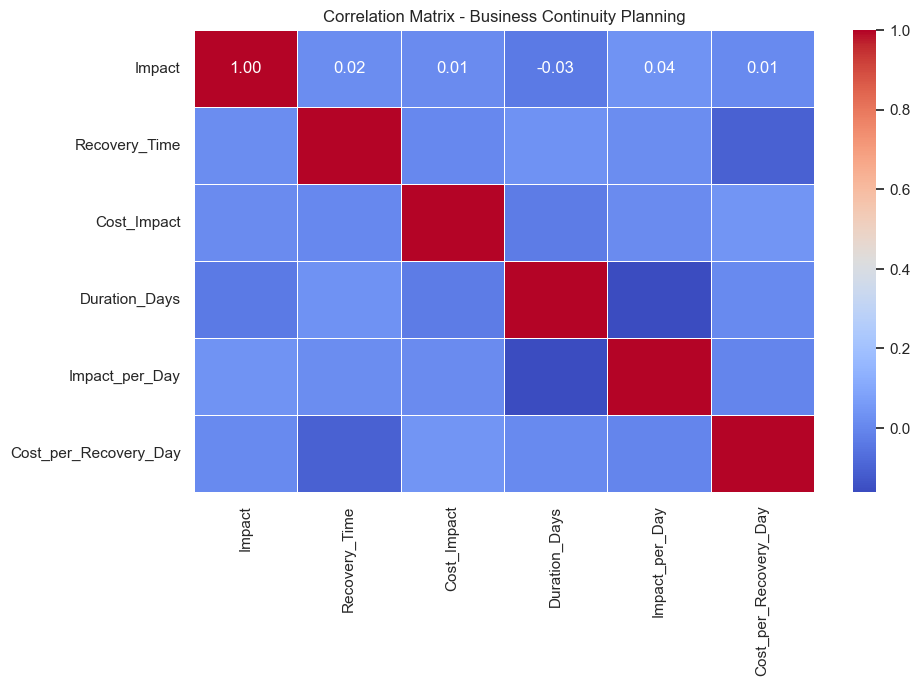

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

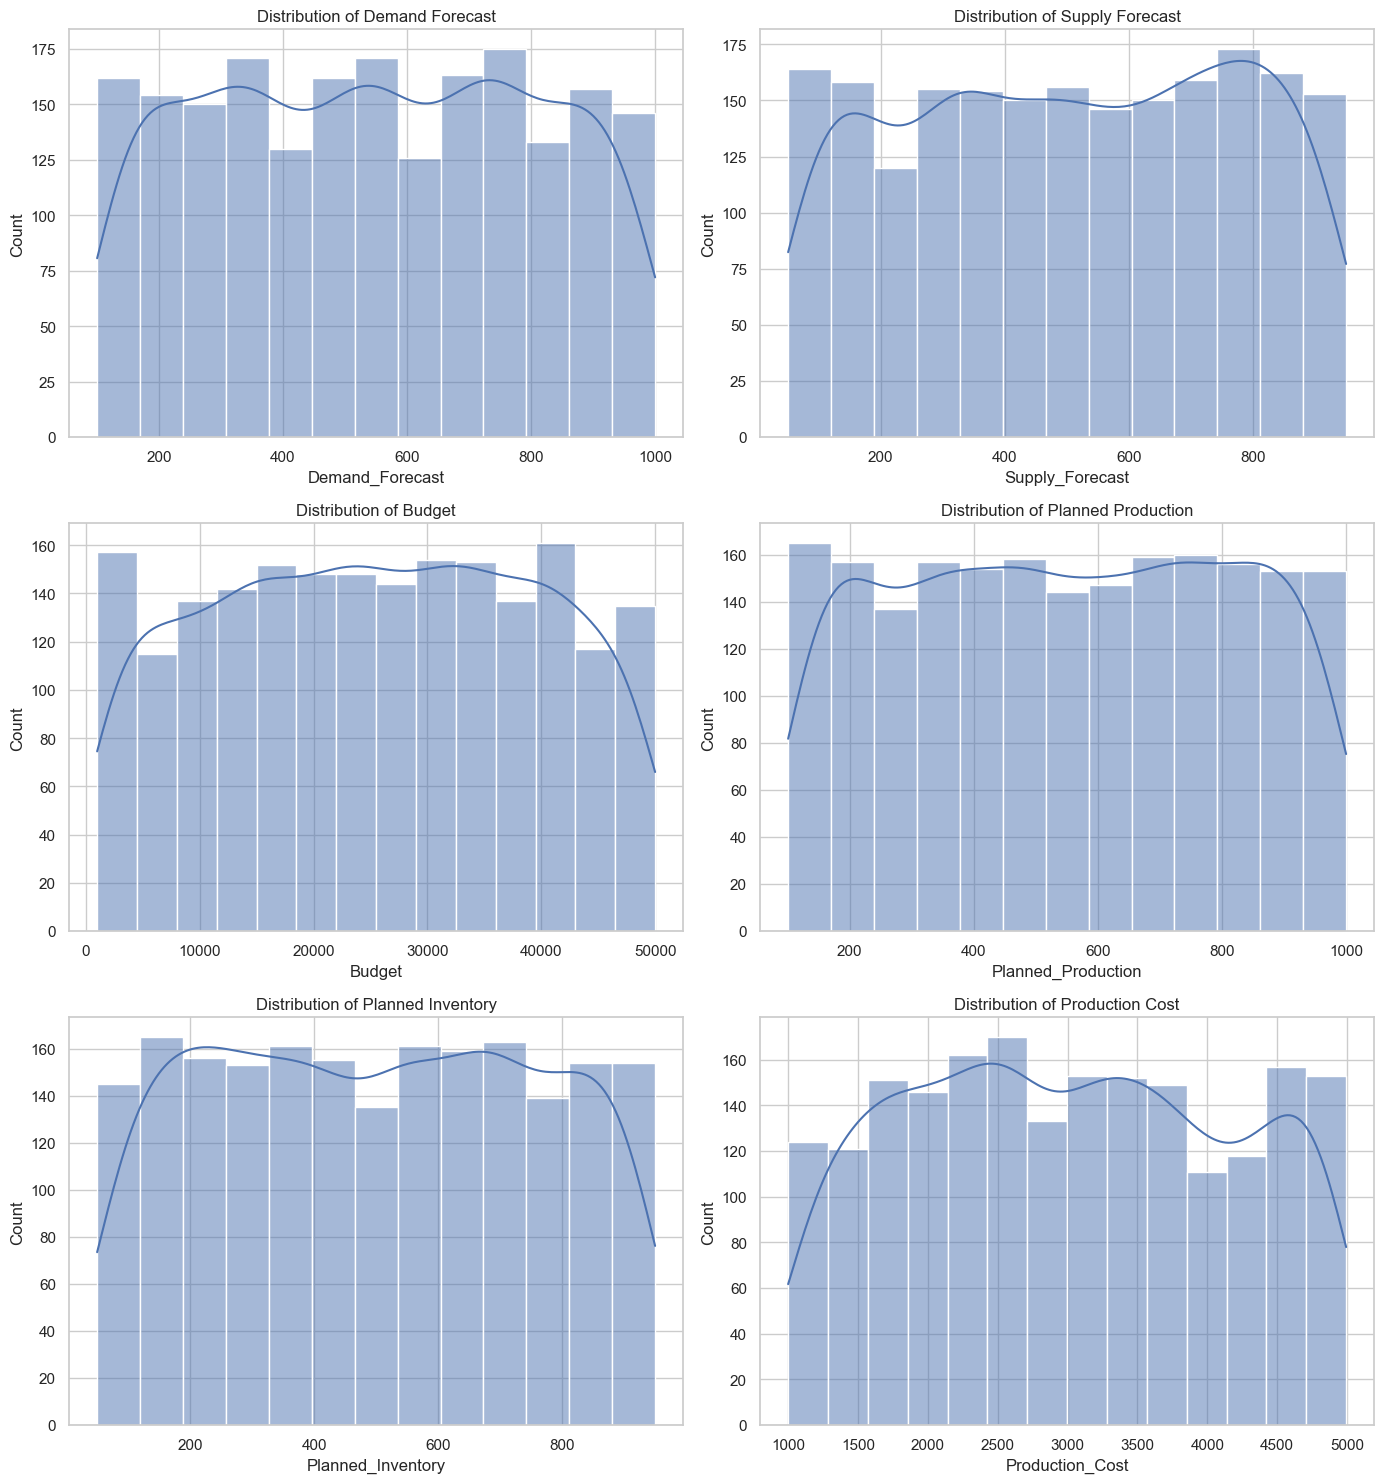

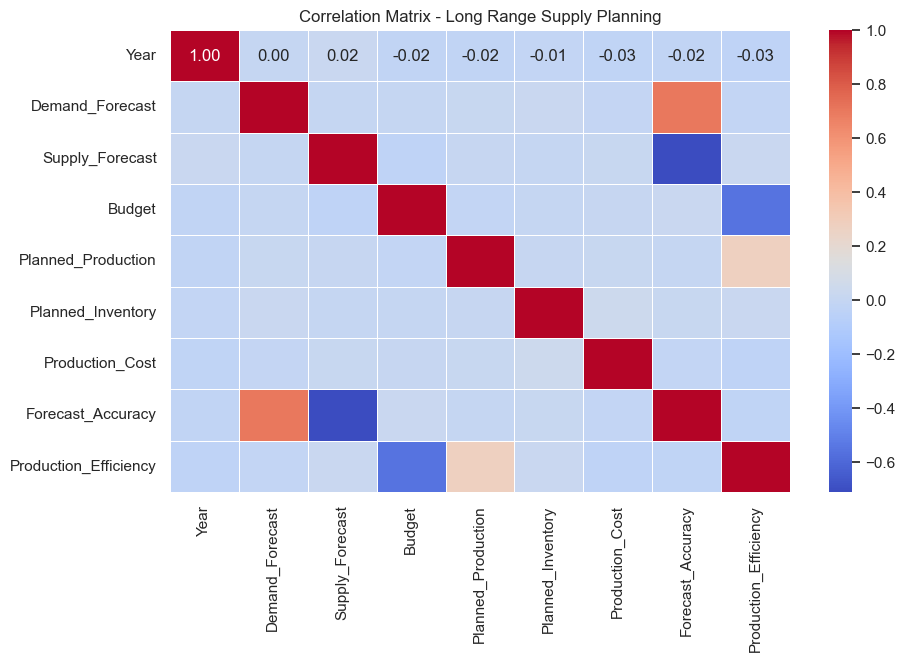

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

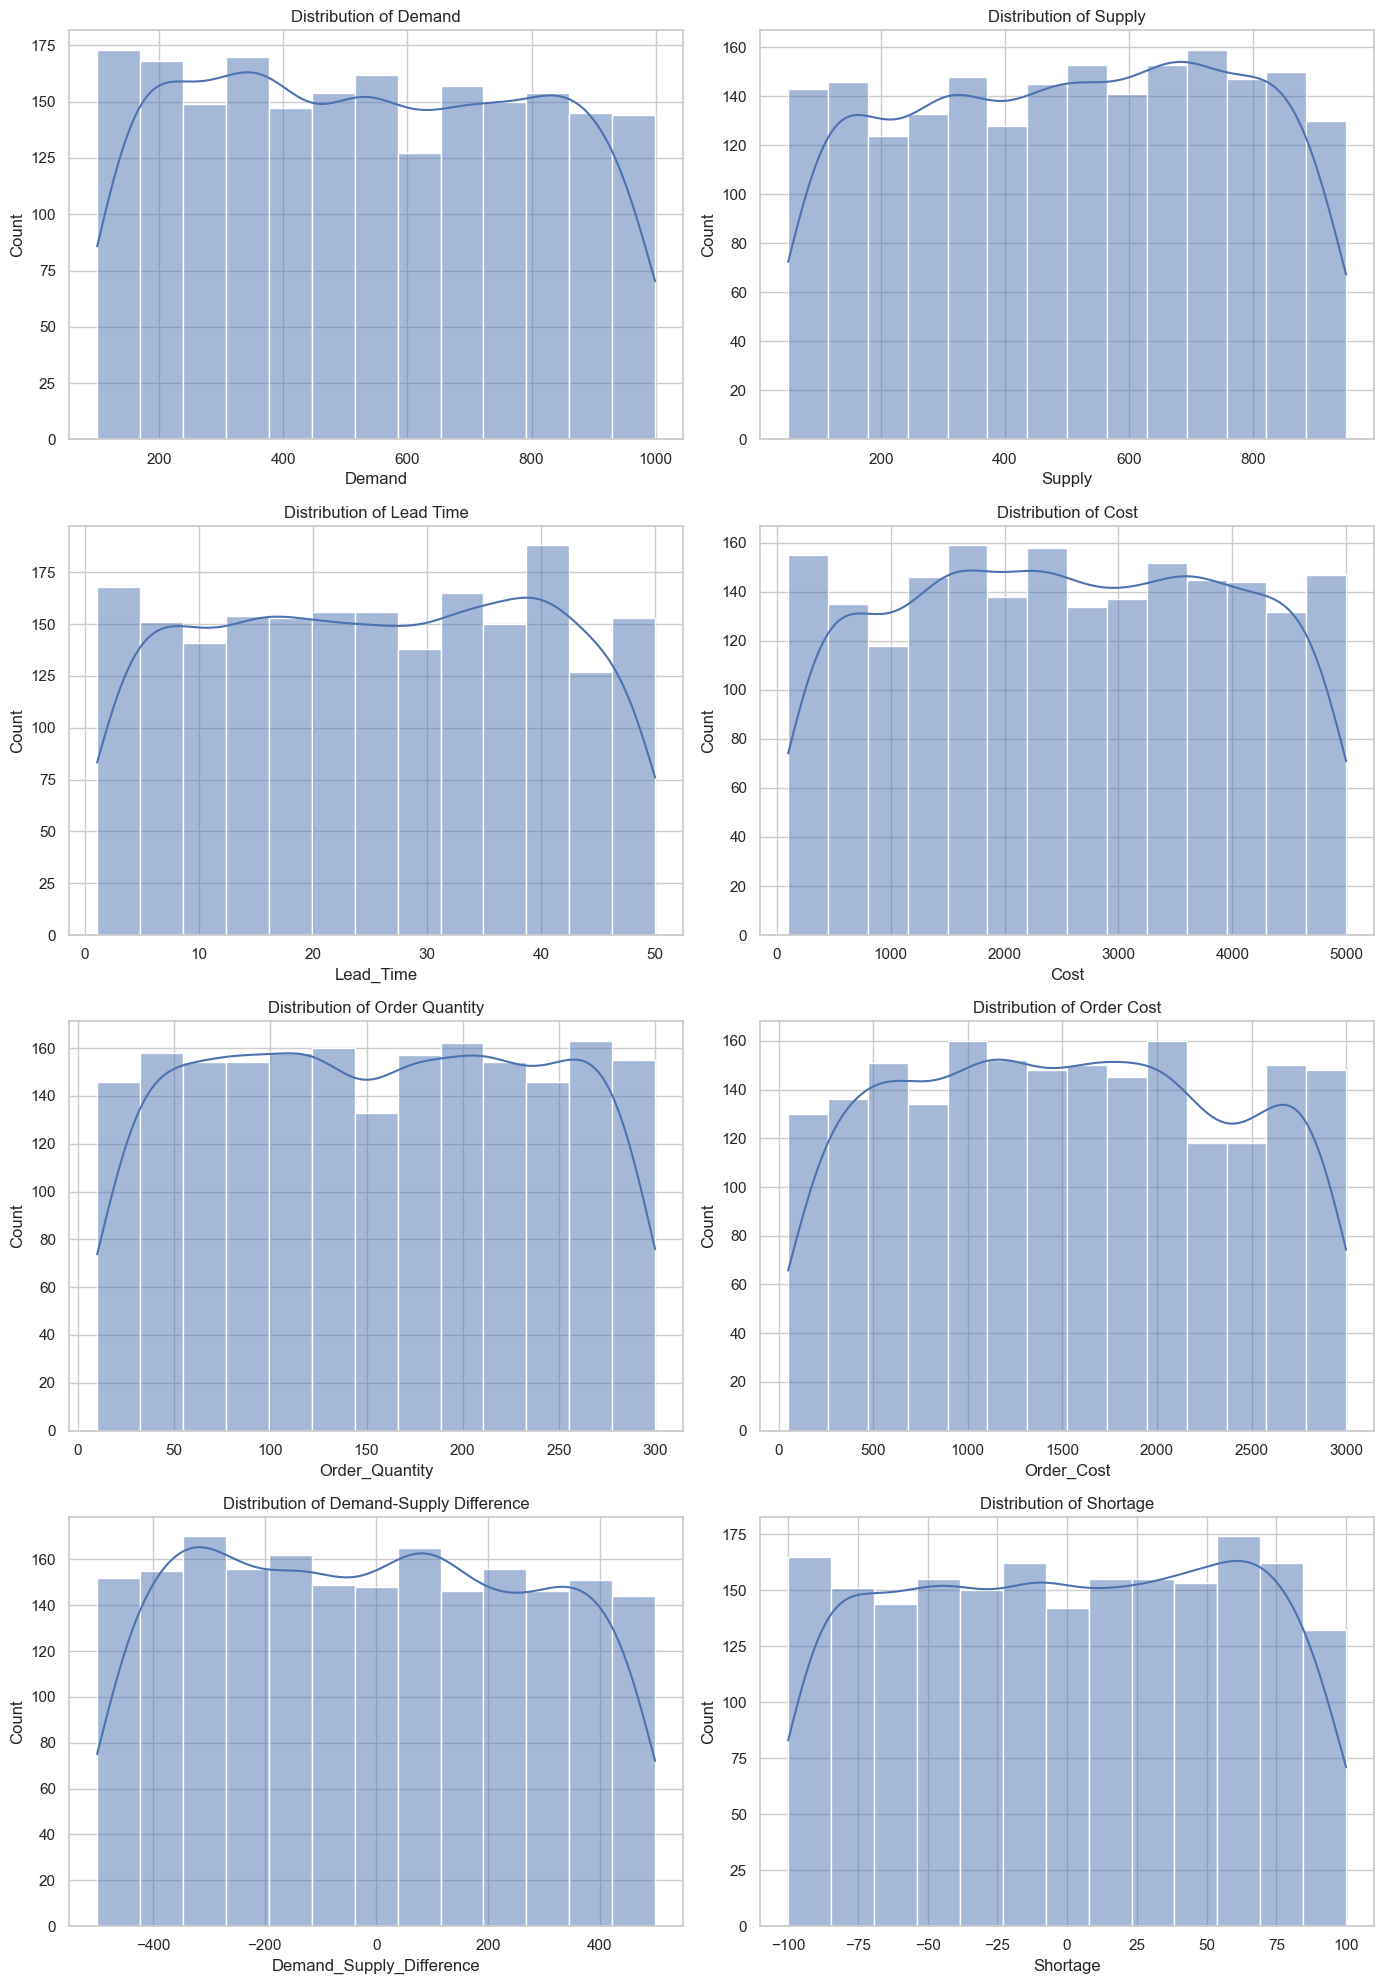

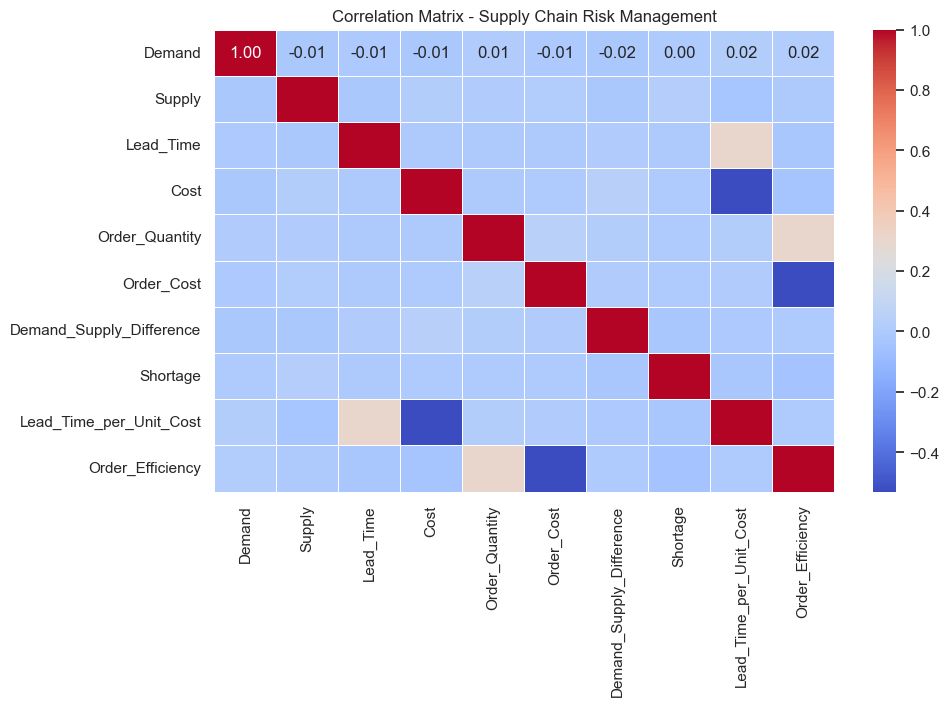

In [85]:
# Function to plot correlation matrix
def plot_correlation_matrix(df, title):
    corr = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Perform EDA
eda_continuity(df_continuity_clean)
eda_planning(df_planning_clean)
eda_risk(df_risk_clean)

In [69]:
#Feature Generation

# New features for Business Continuity Planning Dataset
df_continuity_clean['Impact_per_Day'] = df_continuity_clean['Impact'] / df_continuity_clean['Duration_Days']
df_continuity_clean['Cost_per_Recovery_Day'] = df_continuity_clean['Cost_Impact'] / df_continuity_clean['Recovery_Time']

# New features for Long Range Supply Planning Dataset
df_planning_clean['Forecast_Accuracy'] = df_planning_clean['Demand_Forecast'] - df_planning_clean['Supply_Forecast']
df_planning_clean['Production_Efficiency'] = df_planning_clean['Planned_Production'] / df_planning_clean['Budget']

# New features for Supply Chain Risk Management Dataset
df_risk_clean['Lead_Time_per_Unit_Cost'] = df_risk_clean['Lead_Time'] / df_risk_clean['Cost']
df_risk_clean['Order_Efficiency'] = df_risk_clean['Order_Quantity'] / df_risk_clean['Order_Cost']


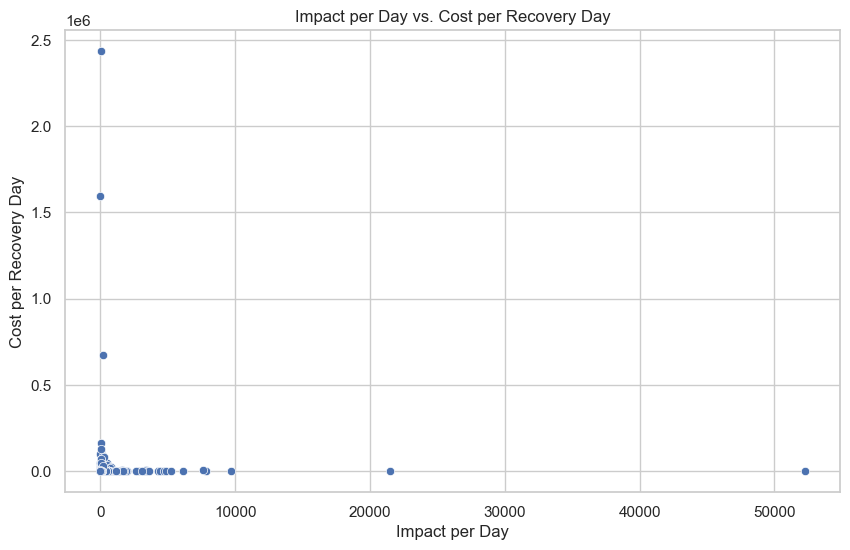

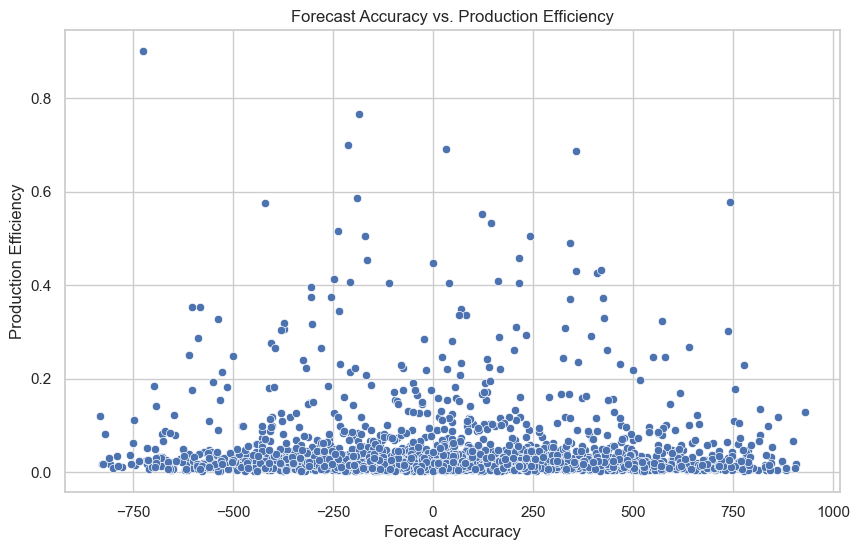

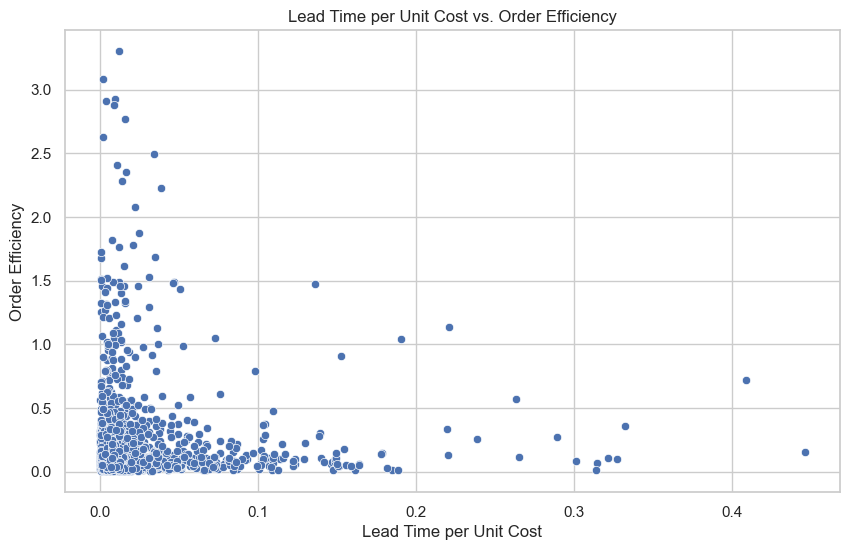

In [71]:
#Features Visualizations

# Impact per Day vs. Cost per Recovery Day (Business Continuity Planning)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impact_per_Day', y='Cost_per_Recovery_Day', data=df_continuity_clean)
plt.title('Impact per Day vs. Cost per Recovery Day')
plt.xlabel('Impact per Day')
plt.ylabel('Cost per Recovery Day')
plt.show()

# Forecast Accuracy vs. Production Efficiency (Long Range Supply Planning)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Forecast_Accuracy', y='Production_Efficiency', data=df_planning_clean)
plt.title('Forecast Accuracy vs. Production Efficiency')
plt.xlabel('Forecast Accuracy')
plt.ylabel('Production Efficiency')
plt.show()

# Lead Time per Unit Cost vs. Order Efficiency (Supply Chain Risk Management)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lead_Time_per_Unit_Cost', y='Order_Efficiency', data=df_risk_clean)
plt.title('Lead Time per Unit Cost vs. Order Efficiency')
plt.xlabel('Lead Time per Unit Cost')
plt.ylabel('Order Efficiency')
plt.show()


In [35]:
#Data Preprocessing begins here

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to preprocess the data (to reduce complexity in future steps, decided to make a function)
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Preprocessing for numerical data
    numerical_transformer = StandardScaler()
    
    # Preprocessing for categorical data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Creating and fit the preprocessing pipeline
    X_preprocessed = preprocessor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, preprocessor

# Preprocessing Business Continuity Planning Dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont, preprocessor_cont = preprocess_data(df_continuity_clean, 'Cost_Impact')

# Preprocessing Long Range Supply Planning Dataset
X_train_plan, X_test_plan, y_train_plan, y_test_plan, preprocessor_plan = preprocess_data(df_planning_clean, 'Production_Cost')

# Preprocessing Supply Chain Risk Management Dataset
X_train_risk, X_test_risk, y_train_risk, y_test_risk, preprocessor_risk = preprocess_data(df_risk_clean, 'Cost')

# Displaying the preprocessed training data for each dataset
print("Preprocessed Business Continuity Planning (Training):")
print(pd.DataFrame(X_train_cont).head())

print("Preprocessed Long Range Supply Planning (Training):")
print(pd.DataFrame(X_train_plan).head())

print("Preprocessed Supply Chain Risk Management (Training):")
print(pd.DataFrame(X_train_risk).head())

# Checking shapes of the datasets
print("Shapes of datasets:")
print(X_train_cont.shape, X_test_cont.shape, y_train_cont.shape, y_test_cont.shape)
print(X_train_plan.shape, X_test_plan.shape, y_train_plan.shape, y_test_plan.shape)
print(X_train_risk.shape, X_test_risk.shape, y_train_risk.shape, y_test_risk.shape)


Preprocessed Business Continuity Planning (Training):
         0         1         2         3         4    5    6    7    8    9   \
0  0.923826  1.343995 -0.531093 -0.063534 -0.072426  0.0  1.0  0.0  0.0  0.0   
1  0.570068 -0.891054 -0.347812 -0.076106 -0.038066  0.0  0.0  0.0  1.0  0.0   
2 -0.617049 -0.199184  0.957241 -0.105843 -0.072167  0.0  0.0  1.0  0.0  0.0   
3 -1.187618 -1.422159 -0.514332 -0.101737  0.039195  0.0  0.0  1.0  0.0  0.0   
4  1.154639 -0.800164 -1.236117  0.018431 -0.053540  0.0  1.0  0.0  0.0  0.0   

    10   11   12   13  
0  0.0  0.0  0.0  1.0  
1  1.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  
3  1.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  
Preprocessed Long Range Supply Planning (Training):
         0         1         2         3         4         5         6   \
0  0.231972  0.157563 -0.517901 -1.427402  1.332313 -0.022471  0.479512   
1  1.512374 -0.675549 -0.436080  1.170825  0.415094 -0.887209 -0.165103   
2 -0.559461 -1.715246 -0.806603  1.175408 -1

In [43]:
#Model Generation

In [75]:
# Linear Regression for Long Range Supply Planning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_plan, y_train_plan)

# Predict and evaluate the model
y_pred_plan = lr_model.predict(X_test_plan)
mse_plan = mean_squared_error(y_test_plan, y_pred_plan)
r2_plan = r2_score(y_test_plan, y_pred_plan)

print("Linear Regression - Long Range Supply Planning")
print(f"Mean Squared Error: {mse_plan}")
print(f"R^2 Score: {r2_plan}")

Linear Regression - Long Range Supply Planning
Mean Squared Error: 1207483.7424213048
R^2 Score: 0.0001277623840543196


In [77]:
# RandomForestClassifier for Supply Chain Risk Management

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming we have a binary classification target
# For simplicity, created a binary target: Cost > median cost
y_train_risk_binary = (y_train_risk > np.median(y_train_risk)).astype(int)
y_test_risk_binary = (y_test_risk > np.median(y_test_risk)).astype(int)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_risk, y_train_risk_binary)

y_pred_risk = rf_model.predict(X_test_risk)
accuracy_risk = accuracy_score(y_test_risk_binary, y_pred_risk)
conf_matrix_risk = confusion_matrix(y_test_risk_binary, y_pred_risk)
class_report_risk = classification_report(y_test_risk_binary, y_pred_risk)

print("RandomForestClassifier - Supply Chain Risk Management")
print(f"Accuracy: {accuracy_risk}")
print("Confusion Matrix:")
print(conf_matrix_risk)
print("Classification Report:")
print(class_report_risk)

RandomForestClassifier - Supply Chain Risk Management
Accuracy: 0.9125
Confusion Matrix:
[[165  35]
 [  0 200]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       200
           1       0.85      1.00      0.92       200

    accuracy                           0.91       400
   macro avg       0.93      0.91      0.91       400
weighted avg       0.93      0.91      0.91       400



In [78]:
# DecisionTreeRegressor for Business Continuity

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_cont, y_train_cont)

# Predict and evaluate the model
y_pred_cont = dt_model.predict(X_test_cont)
mse_cont = mean_squared_error(y_test_cont, y_pred_cont)
mae_cont = mean_absolute_error(y_test_cont, y_pred_cont)
r2_cont = r2_score(y_test_cont, y_pred_cont)

print("DecisionTreeRegressor - Business Continuity Planning")
print(f"Mean Squared Error: {mse_cont}")
print(f"Mean Absolute Error: {mae_cont}")
print(f"R^2 Score: {r2_cont}")

DecisionTreeRegressor - Business Continuity Planning
Mean Squared Error: 8292895.362677556
Mean Absolute Error: 1629.551961793003
R^2 Score: 0.9577009136819119


In [49]:
#Monte Carlo Simulation

Probability of Shortage (Supply Chain Risk Management):
Probability: 0.5185

Production Cost (Long Range Supply Planning):
Mean: 3012.76995249758
Standard Deviation: 85.42131383545517

Cost Impact (Business Continuity Planning):
Mean: 24866.6986533545
Standard Deviation: 13896.7222356632


C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


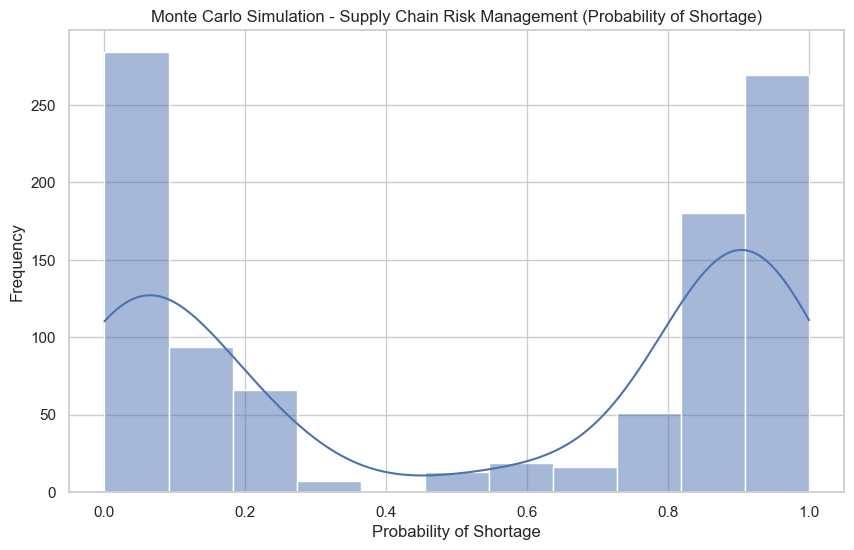

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


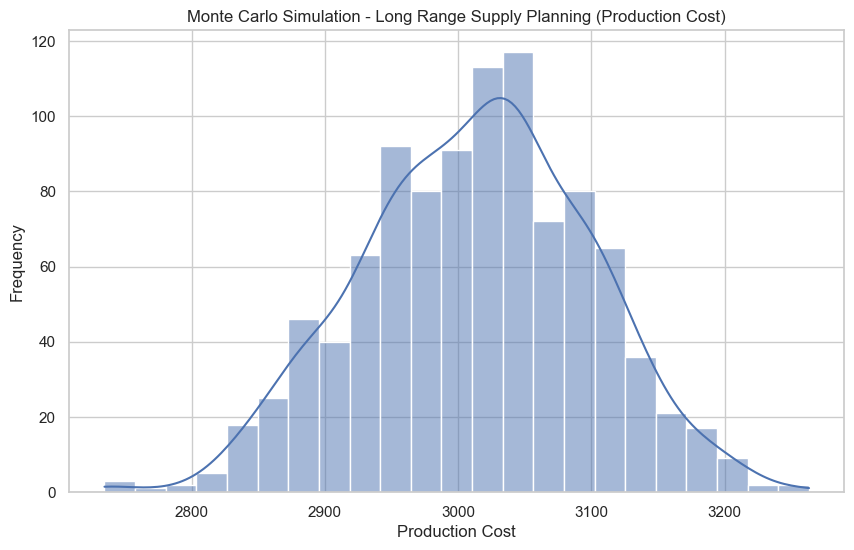

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


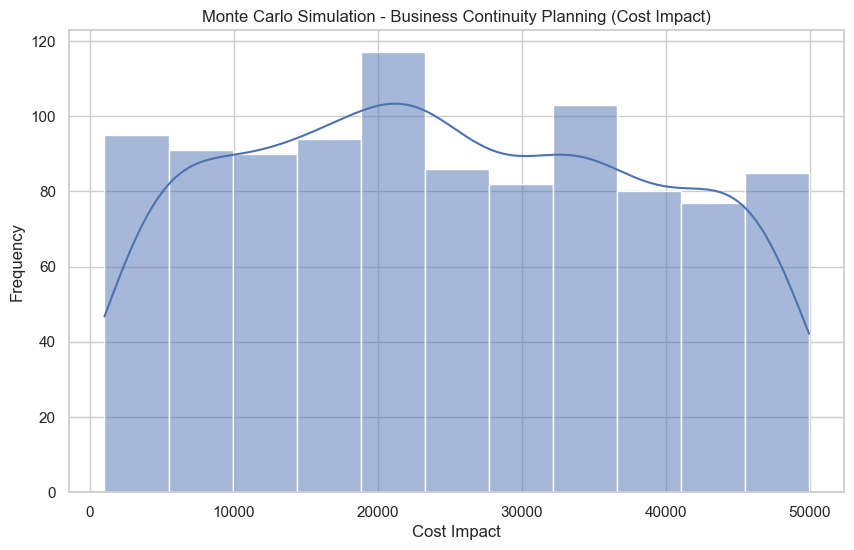

In [87]:
num_simulations = 1000

# Creating a function to perform Monte Carlo Simulation
def monte_carlo_simulation(model, preprocessor, X_sample, target_type='regression'):
    # Transforming the sample using the preprocessor
    X_sample_transformed = preprocessor.transform(X_sample)
    
    # Performing predictions
    if target_type == 'regression':
        predictions = model.predict(X_sample_transformed)
    else:
        predictions = model.predict_proba(X_sample_transformed)[:, 1]  # Probability of class 1
    
    return predictions

# Generating random samples for Business Continuity Planning
X_sample_cont = df_continuity_clean.sample(num_simulations, replace=True)
predictions_cont = monte_carlo_simulation(dt_model, preprocessor_cont, X_sample_cont)

# Generating random samples for Long Range Supply Planning
X_sample_plan = df_planning_clean.sample(num_simulations, replace=True)
predictions_plan = monte_carlo_simulation(lr_model, preprocessor_plan, X_sample_plan)

# Generating random samples for Supply Chain Risk Management
X_sample_risk = df_risk_clean.sample(num_simulations, replace=True)
predictions_risk = monte_carlo_simulation(rf_model, preprocessor_risk, X_sample_risk, target_type='classification')

# Calculating probability of shortage
probability_of_shortage = np.mean(predictions_risk)

# Calculating mean and standard deviation for production cost
mean_production_cost = np.mean(predictions_plan)
std_production_cost = np.std(predictions_plan)

# Calculating mean and standard deviation for cost impact
mean_cost_impact = np.mean(predictions_cont)
std_cost_impact = np.std(predictions_cont)

# Results
print("Probability of Shortage (Supply Chain Risk Management):")
print(f"Probability: {probability_of_shortage}")

print("\nProduction Cost (Long Range Supply Planning):")
print(f"Mean: {mean_production_cost}")
print(f"Standard Deviation: {std_production_cost}")

print("\nCost Impact (Business Continuity Planning):")
print(f"Mean: {mean_cost_impact}")
print(f"Standard Deviation: {std_cost_impact}")

plt.figure(figsize=(10, 6))
sns.histplot(predictions_risk, kde=True)
plt.title('Monte Carlo Simulation - Supply Chain Risk Management (Probability of Shortage)')
plt.xlabel('Probability of Shortage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(predictions_plan, kde=True)
plt.title('Monte Carlo Simulation - Long Range Supply Planning (Production Cost)')
plt.xlabel('Production Cost')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(predictions_cont, kde=True)
plt.title('Monte Carlo Simulation - Business Continuity Planning (Cost Impact)')
plt.xlabel('Cost Impact')
plt.ylabel('Frequency')
plt.show()
